# Grocery Habit Analysis - Data Plots

In [1]:
# Import for data manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

In [ ]:
# Import the data file
df_habits = pd.read_csv('grocery_habits.csv')
df_habits.head()

In [ ]:
# Rename the columns
df_habits = df_habits.rename(columns={"Timestamp": "Time"})
df_habits = df_habits.rename(columns={"Email Address": "Email"})
df_habits = df_habits.rename(columns={"Are you comfortable with us reaching out for some quick followup questions? Say yes if you're awesome and epic.": "Followup"})
df_habits = df_habits.rename(columns={"Who do you typically grocery shop groceries for?" : "Audience"})
df_habits = df_habits.rename(columns={"How often do you go grocery shopping?" : "Frequency"})
df_habits = df_habits.rename(columns={"Do you prefer to shop at a specific grocery store or multiple stores?" : "Number of Stores"})
df_habits = df_habits.rename(columns={"What kind of grocery store do you usually shop at ?" : "Type of Store"})
df_habits = df_habits.rename(columns={"Walk me through your grocery shopping process/describe your typical shopping experience (ex: what you buy, what aisles you visit, favorite aisles, time spent, etc)." : "Shopping Process"})
df_habits = df_habits.rename(columns={"How do you know where to go first in a grocery store?" : "Navigating In Store"})
df_habits = df_habits.rename(columns={"Do you have a budget when going grocery shopping?" : "Budget"})
df_habits = df_habits.rename(columns={"Do you usually create a shopping list before going to the grocery store?" : "List"})
df_habits = df_habits.rename(columns={"If you selected digital list, what apps or tools do you use?" : "Digital List Tools"})
df_habits = df_habits.rename(columns={"How often do you stick to your list versus making spontaneous purchases?" : "Stick to List Frequency"})
df_habits = df_habits.rename(columns={"How often do you find yourself throwing away expired food items?" : "Expired Food Frequency"})
df_habits = df_habits.rename(columns={"Why do you think you have this habit?" : "Why Expired"})
df_habits = df_habits.rename(columns={"What do you do with an expired/almost expired item?" : "Use Expired"})
df_habits = df_habits.rename(columns={"What do you most often find yourself throwing away? Please choose two max." : "Common Expired"})
df_habits = df_habits.rename(columns={"How familiar are you with sell by dates and do you know where to find them?" : "Find Sell By"})
df_habits = df_habits.rename(columns={"What methods do you currently use to remember expiration dates on perishable items?" : "Track Expiration"})
df_habits = df_habits.rename(columns={"What challenges or struggles do you currently face when it comes to managing and keeping track of expiration dates?" : "Challenges in Tracking"})
df_habits = df_habits.rename(columns={"Do you believe that you tend to throw away expired food earlier or later than your peers?" : "Relative Amount Expired"})
df_habits = df_habits.rename(columns={"Does most of your food waste come from prepared foods or from groceries themselves?\n\nFun fact: Per 2/4 rule by the FDA, if you put the leftovers in fridge within 2 hours it’s good for 4 days." : "Prepared or Grocery Waste"})
df_habits = df_habits.rename(columns={"If you could come up with a solution to these problems, what would you want?" : "Solution"})
df_habits = df_habits.rename(columns={"Do you already use apps to track groceries' expiration dates?" : "App"})

**What is the data telling us about the responses to the following question:**

***"Who do you typically grocery shop for?"***

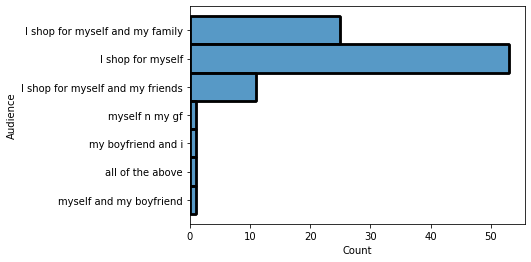

In [2]:
audience = sns.histplot(y='Audience', data = df_habits)

**What is the data telling us about the responses to the following question:**

***"How often do you go grocery shopping?"***

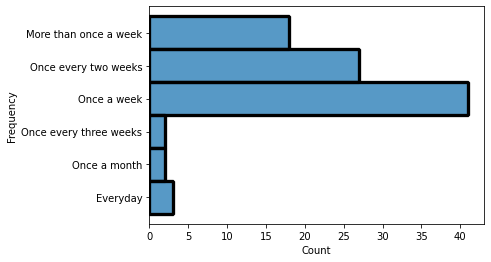

In [3]:
frequency = sns.histplot(y='Frequency', data = df_habits)

**What is the data telling us about the responses to the following question:**

***"Do you prefer to shop at a specific grocery store or multiple stores?"***

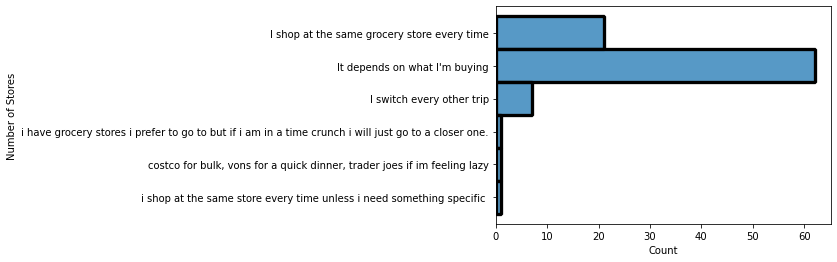

In [4]:
num_stores = sns.histplot(y = 'Number of Stores', data = df_habits)

**What is the data telling us about the responses to the following question:**

***"Do you usually create a shopping list before going to the grocery store?"***

Text(0.5, 1.0, 'Do you usually create a shopping list before going to the grocery store?')

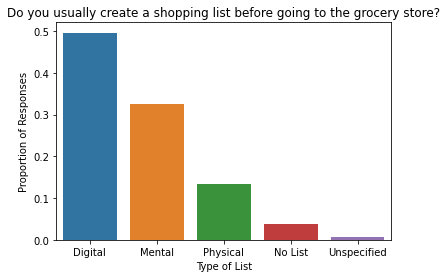

In [7]:
#List
dig_list = pd.DataFrame()
dig_list = df_habits[df_habits['List'].str.contains("digital list")]
#print(dig_list.shape[0])

mental_list = pd.DataFrame()
mental_list = df_habits[df_habits['List'].str.contains("I make a mental list")]
 #44

physical = pd.DataFrame()
physical = df_habits[df_habits['List'].str.contains("I make a physical list")]
#18

no_list = pd.DataFrame()
no_list = df_habits[df_habits['List'].str.contains("No I don't make a list")]
#5

misc = pd.DataFrame()
misc = df_habits[df_habits['List'].str.contains("sometimes")]
#1



data = {'Proportion of Responses': [67/135, 44/135, 18/135, 5/135, 1/135],
       'Type of List':['Digital', 'Mental','Physical','No List', 'Unspecified']}
df_new = pd.DataFrame(data)


list_plot = sns.barplot(x='Type of List', y='Proportion of Responses', data = df_new)
list_plot.set_title('Do you usually create a shopping list before going to the grocery store?')


### Digital List Tools Setup

In [ ]:
#enable drop if you would like to show the graph! turn it to a comment if you're loading any graphs after this cell 
#df_habits.dropna(subset=['Digital List Tools'], inplace=True)
digi_list = df_habits[df_habits['Digital List Tools'].str.contains("notes|Notes")].shape[0]
reminders_list = df_habits[df_habits['Digital List Tools'].str.contains("reminders|todo|todoist", case=False)].shape[0]
#68 = responses after dropping blanks
#31 = part sum
#digi_list should be 56
part_sum = digi_list + reminders_list
total = digi_list + reminders_list + other
other = df_habits['Digital List Tools'].shape[0] - part_sum
digi_list_prop = digi_list / total
reminders_list_prop = reminders_list / total
other_prop = other/total
print(digi_list_prop)

data_1 = {'Proportion of Responses': [digi_list_prop, reminders_list_prop, other_prop],
       'Type of List':['Notes App/Text', 'Reminders/ToDo App','Other Method']}
df_slay = pd.DataFrame(data_1)
slay_plot = sns.barplot(x='Type of List', y='Proportion of Responses', data = data_1)
slay_plot.set_title('Digital List Tools Used')
plt.xlabel('Method Used')
plt.ylabel('Proportion of Responses')

### Expiration Date Resonse Setup

In [ ]:
#Find Sell By
#ye_use = df_habits[df_habits['Find Sell By'].str.contains("Yes, I am familiar and know where to find it", case=False)].shape[0]
#ye_nouse = df_habits[df_habits['Find Sell By'].str.contains("no", case=False)].shape[0]
#ne = df_habits[df_habits['Find Sell By'].str.contains("no", case=False)].shape[0]

find_sellby= sns.barplot(x='Find Sell By', data=df_habits)

**What is the data telling us about the responses to the following question:**

***"What methods do you currently use to remember expiration dates on perishable items?"***

68


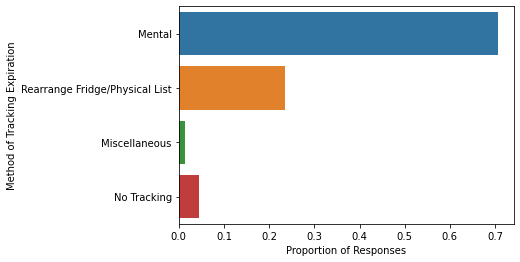

In [28]:
#Track Expiration
#df_habits.dropna(subset=['Track Expiration'], inplace=True)
mental_ls = df_habits[df_habits['Track Expiration'].str.contains("mental", case=False)].shape[0]
no_ls = df_habits[df_habits['Track Expiration'].str.contains("don't|dont|never|nothing|none|N/A", case=False)].shape[0]
phys_ls = df_habits[df_habits['Track Expiration'].str.contains("physically|physical", case=False)].shape[0]
other_ls = df_habits[df_habits['Track Expiration'].str.contains('I write it|honestly|same time')].shape[0]
summation = mental_ls + no_ls+phys_ls+other_ls
print(summation)

m_prop = mental_ls/summation
n_prop = no_ls/summation 
phys_prop = phys_ls/summation
other_prop = other_ls/summation

data_3 = {'Proportion of Responses': [m_prop, phys_prop, other_prop, n_prop],
         'Method of Tracking Expiration':['Mental', 'Rearrange Fridge/Physical List','Miscellaneous', 'No Tracking']}
df_track = pd.DataFrame(data_3)
track_exp = sns.barplot(y='Method of Tracking Expiration', x = 'Proportion of Responses', data = df_track )

### Expired Food Response Setup

In [ ]:
#Expired Food Frequency
#fixed total # of entries
print(df_habits['Expired Food Frequency'].shape[0])
occasional = df_habits[df_habits['Expired Food Frequency'].str.contains("occasionally", case=False)].shape[0]
never = df_habits[df_habits['Expired Food Frequency'].str.contains("never", case=False)].shape[0]
every_wk = df_habits[df_habits['Expired Food Frequency'].str.contains("almost every week", case=False)].shape[0]
rare = df_habits[df_habits['Expired Food Frequency'].str.contains("rarely|only", case=False)].shape[0]

tot=occasional + never + every_wk+rare
every_wk = every_wk/tot
occasional = occasional/tot
rare = rare/tot
never = never/tot

data_2 = {'Proportion of Responses': [every_wk, occasional, rare, never],
         'Frequency Expired':['Almost Every Week', 'Less than 3x per month','Rarely', 'Never']}
df_slayy = pd.DataFrame(data_2)
expiry_freq = sns.barplot(y = 'Frequency Expired', x='Proportion of Responses', data = df_slayy)
expiry_freq.set_title('How often does your food expire?')

In [17]:
#df_track['Relative Expired'] = df_habits['Relative Amount Expired']
#proportion = df_track.groupby('Relative Expired')['Method of Tracking Expiration'].value_counts(normalize=True).reset_index()
#prop_df = proportion
#print(prop_df)
#plot_tgt = sns.barplot(x='Relative Expired', y='proportion', hue='Method of Tracking Expiration', data=df_track)
#plot_tgt.set_title('Proportion of Interviewees that Track Expiration and Their Relative Amount Expired')

**What is the data telling us about the responses to the following question:**

***"What do you most often find yourself throwing away? Please choose two max."***

Text(0.5, 1.0, 'Food that most commonly expires')

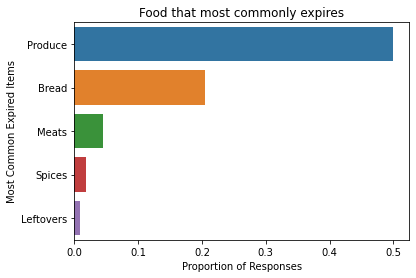

In [39]:
#Common Expired
produce = df_habits[df_habits['Common Expired'].str.contains("produce", case=False)].shape[0]
bread = df_habits[df_habits['Common Expired'].str.contains("bread", case=False)].shape[0]
dairy = df_habits[df_habits['Common Expired'].str.contains("dairy", case=False)].shape[0]
meats = df_habits[df_habits['Common Expired'].str.contains("meats", case=False)].shape[0]
spices = df_habits[df_habits['Common Expired'].str.contains("spices", case=False)].shape[0]
leftovers=df_habits[df_habits['Common Expired'].str.contains("leftovers", case=False)].shape[0]
# produce, bread, dairy, condiments, Meats, Spices
totally=produce + bread + dairy+meats+spices+leftovers 
produce = produce/totally
bread = bread/totally
meats = meats/totally
spices = spices/totally
leftovers = leftovers/totally

data_4 = {'Proportion of Responses': [produce, bread, meats, spices, leftovers],
         'Most Common Expired Items':['Produce', 'Bread','Meats', 'Spices', 'Leftovers']}
df_slayyy = pd.DataFrame(data_4)
common_plot= sns.barplot(y = 'Most Common Expired Items', x='Proportion of Responses', data = df_slayyy)
common_plot.set_title('Food that most commonly expires')

**What is the data telling us about the responses to the following question:**

***"Do you believe that you tend to throw away expired food earlier or later than your peers?"***

3.8529411764705883

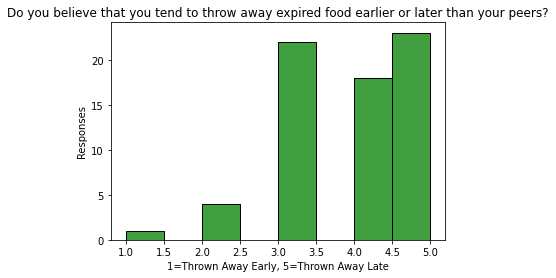

In [11]:
#Relative Amount Expired
relative_amount = sns.histplot(x = 'Relative Amount Expired', data = df_habits, color = 'green')
relative_amount.set_title('Do you believe that you tend to throw away expired food earlier or later than your peers?')
plt.xlabel('1=Thrown Away Early, 5=Thrown Away Late')
plt.ylabel('Responses')
df_habits['Relative Amount Expired'].mean()

**What is the data telling us about the responses to the following question:**

***"Does most of your food waste come from prepared foods or from groceries themselves?"***

Text(0, 0.5, 'Type of Waste')

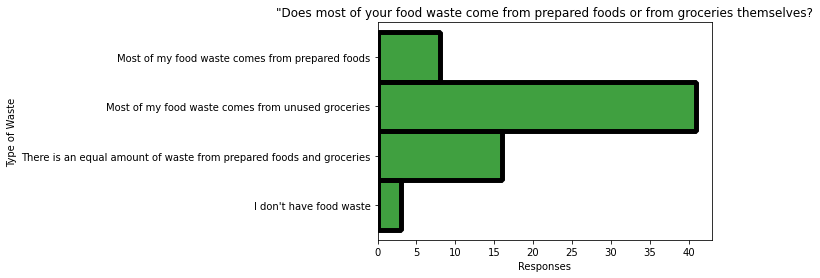

In [12]:
#Prepared or Grocery Waste
type_waste = sns.histplot(y = 'Prepared or Grocery Waste', data = df_habits, color = 'green')
type_waste.set_title('"Does most of your food waste come from prepared foods or from groceries themselves?')
plt.xlabel('Responses')
plt.ylabel('Type of Waste')
#type_waste.set(yticklabels=["Mostly prepared foods", "Mostly Unused Groceries", "Equal Amount of Both", 'No Food Waste'])